<a href="https://colab.research.google.com/github/isuruDeshan98/HelloWorld/blob/master/Copy_of_PhonePricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make sure python ≥3.5 is available
import sys
assert sys.version_info >= (3, 5)
 
# imports basic libraries
import pandas as pd
import numpy as np
import os
 
# import data graphicaly representable libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
# import Scikit-Learn library addons
import sklearn
from sklearn import linear_model
from sklearn import metrics
 
import warnings

In [ ]:
#import data sheet and read it
df = pd.read_csv(r'/content/mobilePhonePrice.csv')
df.head(5)

,name,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),model
0,Samsung Galaxy S7 Edge,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,samsung
1,Samsung Galaxy S7,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,samsung
2,Samsung Galaxy S8+ (64GB),4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,samsung
3,Samsung Galaxy S8,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,samsung
4,Samsung Galaxy S8 Active,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,samsung


In [ ]:
#drop attribute coloum of "name".no need it
df = df.drop(columns=['name'])
df.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),model
0,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,samsung
1,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,samsung
2,4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,samsung
3,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,samsung
4,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,samsung


In [ ]:
#check how meny rows and coloumns
df.info

<bound method DataFrame.info of      ram(GB)  frontCamera(MP)  backCamera(MP)  ...  osVersion  price(Rs.)    model
0          4              5.0            12.0  ...        6.0       39900  samsung
1          4              5.0            12.0  ...        6.0       36900  samsung
2          4              8.0            12.0  ...        7.0       74900  samsung
3          4              5.0            12.0  ...        7.0       66500  samsung
4          4              5.0            12.0  ...        7.0      148570  samsung
..       ...              ...             ...  ...        ...         ...      ...
202        4              8.0            13.0  ...        9.0       62650     sony
203        3              8.0            13.0  ...        8.0       39380     sony
204        3              8.0            23.0  ...        8.0       43900     sony
205        6             13.0            19.0  ...        8.0      148570     sony
206        6              5.0            19.0  ...     

In [ ]:
#check for null values
df.isnull().any()

ram(GB)                 False
frontCamera(MP)         False
backCamera(MP)          False
noOfCam(Front)          False
noOfCam(Back)           False
batteryCapacity(mAh)    False
storage(GB)             False
displaySize             False
year                    False
osVersion               False
price(Rs.)              False
model                   False
dtype: bool

In [ ]:
#check for attribute types
df.dtypes

ram(GB)                   int64
frontCamera(MP)         float64
backCamera(MP)          float64
noOfCam(Front)            int64
noOfCam(Back)             int64
batteryCapacity(mAh)      int64
storage(GB)               int64
displaySize             float64
year                      int64
osVersion               float64
price(Rs.)                int64
model                    object
dtype: object

In [ ]:
#take numerical valued coloumns for plot graphs
numCols = df.columns[df.dtypes==float].tolist() + df.columns[df.dtypes==int].tolist()
numCols

['frontCamera(MP)',
 'backCamera(MP)',
 'displaySize',
 'osVersion',
 'ram(GB)',
 'noOfCam(Front)',
 'noOfCam(Back)',
 'batteryCapacity(mAh)',
 'storage(GB)',
 'year',
 'price(Rs.)']

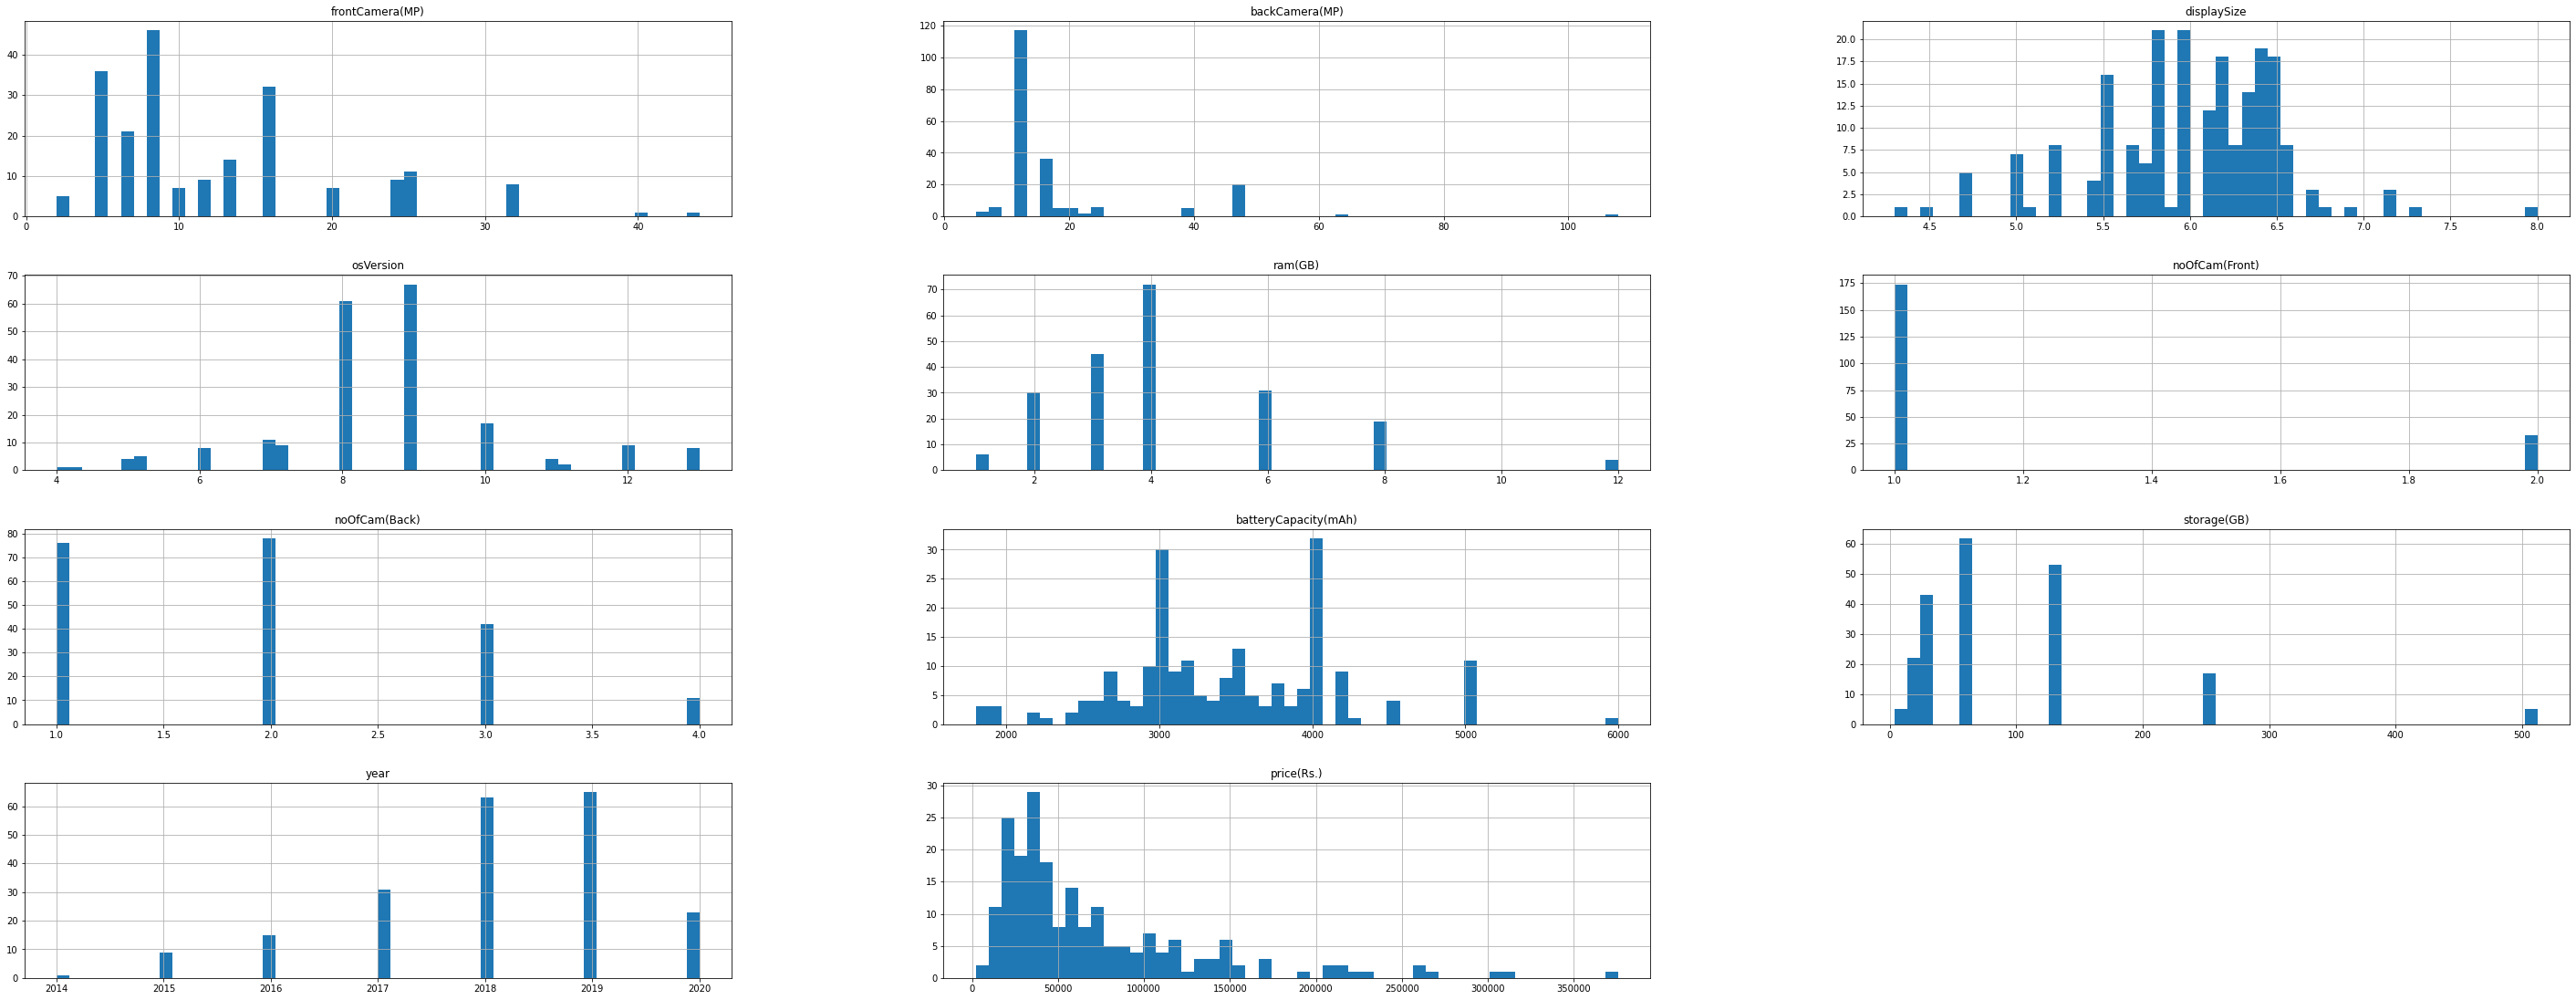

In [ ]:
df[numCols].hist(bins=50,figsize=(50,50), layout=(10,3), rwidth=5)
plt.show()

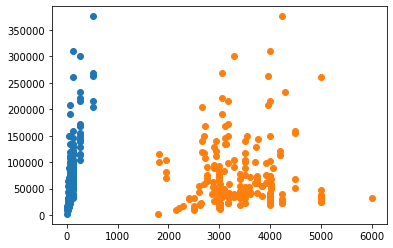

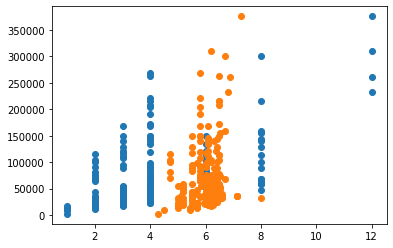

In [ ]:
#some scatter plots of price vary with the attributes
plt.scatter(df["storage(GB)"],df["price(Rs.)"])
plt.scatter(df["batteryCapacity(mAh)"],df["price(Rs.)"])
plt.show()
plt.scatter(df["ram(GB)"],df["price(Rs.)"])
plt.scatter(df["displaySize"],df["price(Rs.)"])
plt.show()

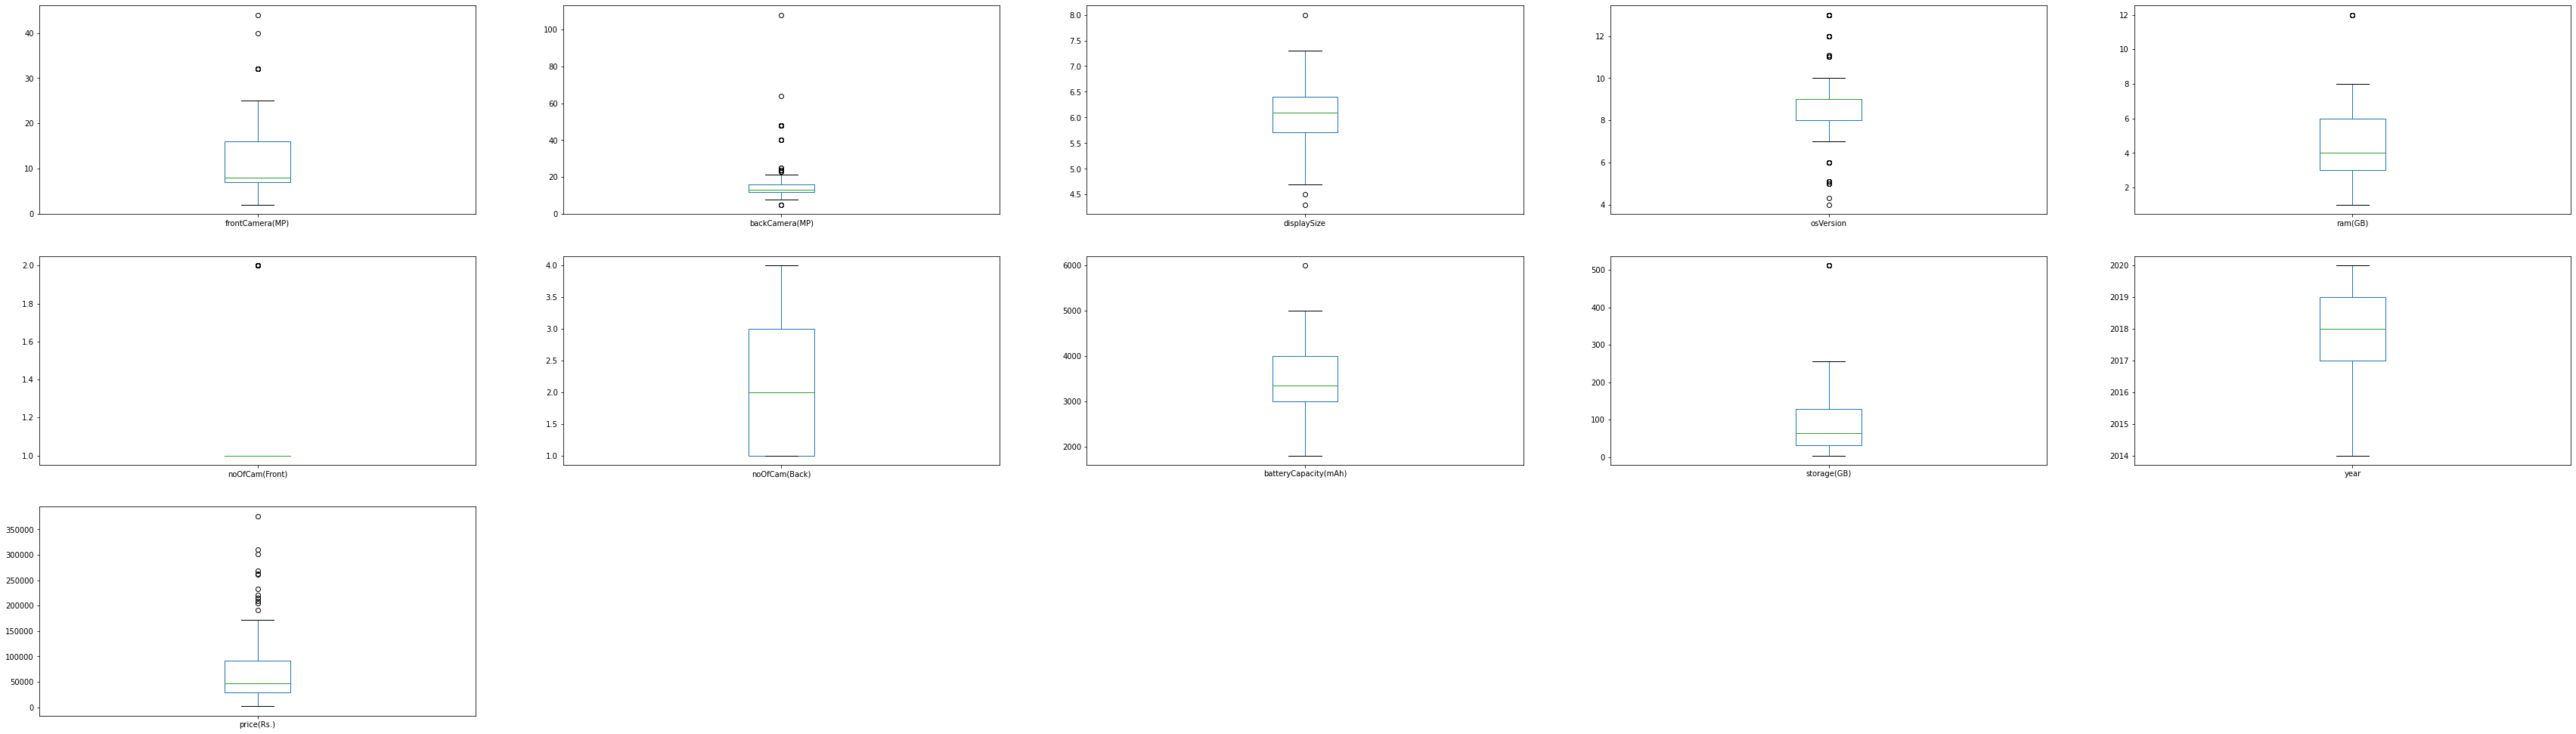

In [ ]:
#some box plots
df[numCols].plot(kind='box',subplots = True,figsize=(60,60),layout = (10,5),sharex = False, sharey = False)
plt.show()

In [ ]:
#take categorical valued column for one hot encoding
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder=OneHotEncoder()
encodedArray=oneHotEncoder.fit_transform(df[['model']]).toarray()
encodedArray[200]

array([0., 0., 0., 0., 0., 0., 1.])

In [ ]:
 encodedDf= pd.DataFrame(encodedArray, columns=['apple','htc','huawei','nokia','oppo','samsung','sony'])
 encodedDf

,apple,htc,huawei,nokia,oppo,samsung,sony
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,0.0,0.0,0.0,0.0,0.0,0.0,1.0
204,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df = df.drop(columns=['model'])

In [ ]:
df = pd.concat([df.reset_index(drop=True),encodedDf.reset_index(drop=True)], axis=1)
df.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),apple,htc,huawei,nokia,oppo,samsung,sony
0,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
corr_matrix = df.corr() #see the corelation between other variable and price
corr_matrix["price(Rs.)"].sort_values(ascending=False)

price(Rs.)              1.000000
storage(GB)             0.762996
osVersion               0.563350
ram(GB)                 0.534497
apple                   0.483073
noOfCam(Front)          0.347002
noOfCam(Back)           0.311246
displaySize             0.232013
samsung                 0.215233
year                    0.173578
frontCamera(MP)         0.071600
backCamera(MP)          0.071481
batteryCapacity(mAh)    0.038287
sony                    0.006610
htc                    -0.057495
oppo                   -0.181983
nokia                  -0.238823
huawei                 -0.247037
Name: price(Rs.), dtype: float64

In [ ]:
#convert all data types to float for minmax scaler
df=df.astype(float)
df.dtypes


ram(GB)                 float64
frontCamera(MP)         float64
backCamera(MP)          float64
noOfCam(Front)          float64
noOfCam(Back)           float64
batteryCapacity(mAh)    float64
storage(GB)             float64
displaySize             float64
year                    float64
osVersion               float64
price(Rs.)              float64
apple                   float64
htc                     float64
huawei                  float64
nokia                   float64
oppo                    float64
samsung                 float64
sony                    float64
dtype: object

In [ ]:
subX=df.drop(['price(Rs.)'],axis=1) #set the variable for X,y
y=df[['price(Rs.)']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tempX = scaler.fit_transform(subX)
X = pd.DataFrame(tempX, columns=subX.columns)
X.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,apple,htc,huawei,nokia,oppo,samsung,sony
0,0.272727,0.071429,0.067961,0.0,0.000000,0.428571,0.055118,0.324324,0.333333,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.272727,0.071429,0.067961,0.0,0.000000,0.285714,0.055118,0.216216,0.333333,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.272727,0.142857,0.067961,0.0,0.333333,0.404762,0.118110,0.513514,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.272727,0.071429,0.067961,0.0,0.333333,0.285714,0.055118,0.405405,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.071429,0.067961,0.0,0.333333,0.523810,0.055118,0.405405,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.15, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test) # acc stands for accuracy 
print("accuracy = ",score)

accuracy =  0.8000572182934955


In [ ]:
y_predict_lr=lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

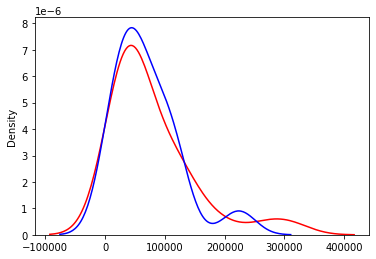

In [ ]:
sns.distplot(y_test,hist=False,color="r",label="Actualvalue")
sns.distplot(y_predict_lr,hist=False,color="b",label="predictvalue")
plt.show

In [ ]:

print ("\n****after linear regression model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_lr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_lr))
print ("RMSError :",np.sqrt(metrics.mean_absolute_error(y_test,y_predict_lr)))


****after linear regression model****
MAError  : 21578.477531079472
MSError  : 971207900.5037465
RMSError : 146.89614539217655


In [ ]:
#import random forest regresser
from sklearn.ensemble import RandomForestRegressor

rFReg=RandomForestRegressor(n_estimators=400,random_state=100)

rFReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [ ]:
y_predict_rfr=rFReg.predict((X_test))

r_square_rfr=metrics.r2_score(y_test,y_predict_rfr)
r_square_rfr

0.6925462546773153

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

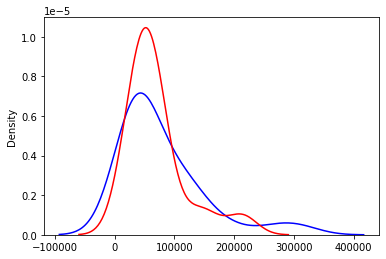

In [ ]:
sns.distplot(y_test,hist=False,color="b",label="fitted")
sns.distplot(y_predict_rfr,hist=False,color="r",label="predictvalue")
plt.show


In [ ]:
print ("\n****after Random Forest Model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_rfr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_rfr))
print ("RMSError :",np.sqrt(metrics.mean_absolute_error(y_test,y_predict_rfr)))


****after Random Forest Model****
MAError  : 22595.00560763889
MSError  : 1493434791.4353547
RMSError : 150.316351764001


In [ ]:
#import decission tree regresser
from sklearn.tree import DecisionTreeRegressor

dTReg=DecisionTreeRegressor(random_state=0)

dTReg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predict_dtr=dTReg.predict((X_test))

r_square_dtr=metrics.r2_score(y_test,y_predict_dtr)
r_square_dtr

0.46835448867129226

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

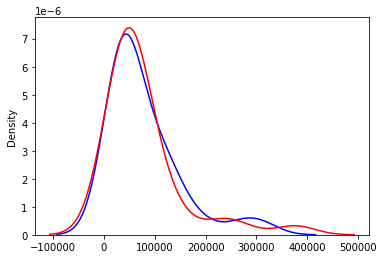

In [ ]:
sns.distplot(y_test,hist=False,color="b",label="fitted")
sns.distplot(y_predict_dtr,hist=False,color="r",label="predictvalue")
plt.show

In [ ]:
print ("\n****after Decision Tree Model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_dtr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_dtr))
print ("RMSError :",np.sqrt(metrics.mean_absolute_error(y_test,y_predict_dtr)))


****after Decision Tree Model****
MAError  : 30343.71875
MSError  : 2582430415.65625
RMSError : 174.19448541787997


In [ ]:
#import neural network
from sklearn.neural_network import MLPRegressor

nNReg=MLPRegressor(random_state=1,max_iter=500)

nNReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_predict_nnr=nNReg.predict((X_test))
score = nNReg.score(X_test, y_test)
score

-1.2758023808993273

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

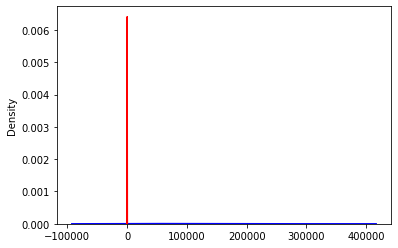

In [ ]:
sns.distplot(y_test,hist=False,color="b",label="fitted")
sns.distplot(y_predict_nnr,hist=False,color="r",label="predictvalue")
plt.show